In [337]:
import numpy as np
from astropy.io import ascii 
from astropy import units as u
import matplotlib.pyplot as plt
import random

In [475]:
#my addition to compare the fits
def chi_square(residual, error):
    chi = np.dot(residual**2, 1/(error**2))
    return(chi)

In [476]:
weird_unit = u.def_unit('10-8erg/cm^2/s', (10**(-8) * u.erg * u.cm**(-2) * u.s**(-1)))

u.add_enabled_units(weird_unit)
( u.erg * u.cm**(-2) * u.s**(-1)).find_equivalent_units()

Primary name,Unit definition,Aliases
10-8erg/cm^2/s,1e-11 kg / s3,
bol,2.51802e-08 kg / s3,f_bol


In [477]:
data = ascii.read("Mann2015_Tables5_6_7.txt")

In [478]:
c = data.colnames


In [479]:
radius = data['R'].value
mass = data['M'].value

In [480]:
def plotting(myfontsize=15, show = True):
    plt.xticks(fontsize=myfontsize)
    plt.yticks(fontsize=myfontsize)
    plt.xlabel(f'Mass ( { data["M"].unit } )',fontsize=myfontsize)
    plt.ylabel(f'Radius ( { data["R"].unit } )',fontsize=myfontsize)
    #plt.ylabel(,fontsize=myfontsize)
    if show:
        plt.show()

In [481]:
m, b = np.polyfit(mass, radius, 1)
print(m, b)

0.8451482085648395 0.06547249746015539


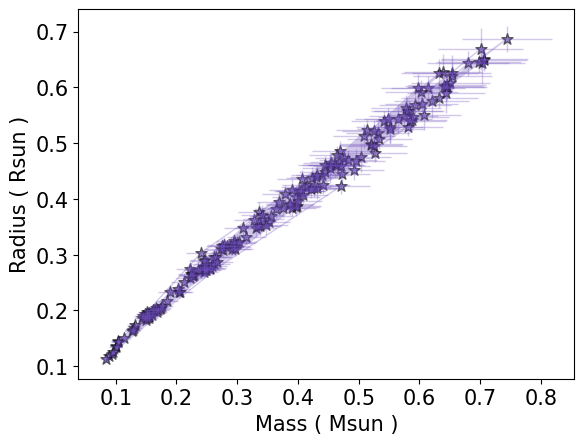

In [482]:
plt.errorbar(mass, radius, xerr = data['e_M'], yerr = data['e_R'], fmt='', alpha = 0.3, ms = 6, lw = 1, color = "#6d4dba",)
plt.scatter(mass, radius, marker='*', s= 70, alpha = 0.6, lw = 1, color = "#6d4dba",  edgecolors='black')
plotting()

# unweighted fit of the data using numpy’s polyfit

0.8451482085648395 0.06547249746015539


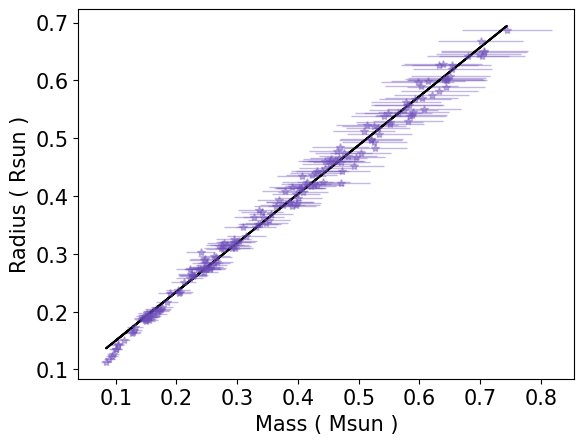

In [483]:
#plt.scatter(mass, radius)
plt.errorbar(mass, radius, xerr = data['e_M'], fmt='*', alpha = 0.4, ms = 6, lw = 1, color = "#6d4dba")
plt.plot(mass, m* mass + b, color = 'black')
print(m, b)
plotting()


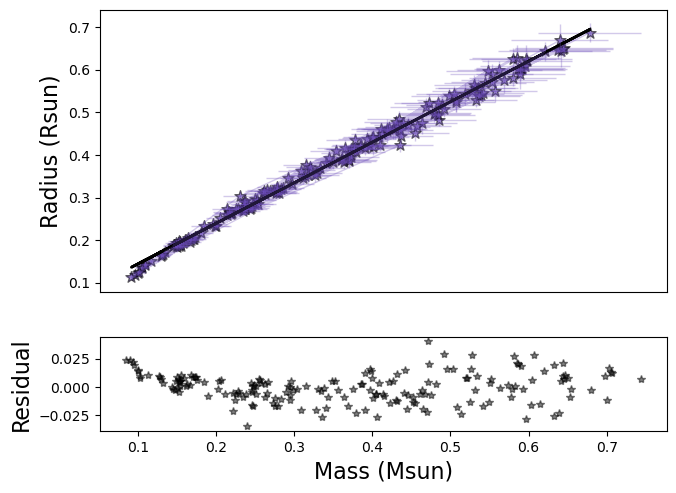

In [484]:
fig, (ax1, ax2) = plt.subplots(2, 1,  gridspec_kw={'height_ratios': [3, 1]})
fig.tight_layout()


ax2.errorbar(mass, m* mass + b - radius, color = 'black', alpha = 0.5, fmt='*')
ax2.set_ylabel('Residual',  fontsize=16)
ax2.set_xlabel(f'Mass ({ data["M"].unit })',  fontsize=16)


#ax1.errorbar(mass, radius, xerr = data['e_M'], fmt='*', alpha = 0.4, ms = 6, lw = 1, color = "#6d4dba")
ax1.set_ylabel(f'Radius ({ data["R"].unit })',  fontsize=16)
ax1.get_xaxis().set_ticks([])
ax1.errorbar(mass, radius, xerr = data['e_M'], yerr = data['e_R'], fmt='', alpha = 0.3, ms = 6, lw = 1, color = "#6d4dba",)
ax1.scatter(mass, radius, marker='*', s= 70, alpha = 0.6, lw = 1, color = "#6d4dba",  edgecolors='black')
ax1.plot(mass, m* mass + b, color = 'black', linewidth =2)

plt.show()

## Lab 2 solving the unweighted normal equation
$$
    X^T Y = X^T X β
$$
$X$ in this case will be 
$$
X =
\begin{bmatrix}
\vec{1} & \vec{\text{mass}}
\end{bmatrix} 
\text{;      }
β =
\begin{bmatrix}
\vec{b} & \vec{m}
\end{bmatrix}
\text{;      }
Y = 
\begin{bmatrix}
\vec{\text{radius}}
\end{bmatrix}
$$
The $\vec{1}$ is necessary in order to get the y intercept of the function
and $Y = \vec{\text{radius}}$

In [485]:
#solving for the normal equation
ones = np.ones(mass.shape)
X = np.array(list(zip(ones,mass)))
Y = radius
XT = np.matrix.transpose(X)
XTX = np.dot(XT, X)
XTY = np.transpose(np.dot(XT, Y))

beta = np.linalg.solve(XTX, XTY)

#this is the y values in the calculated normal equation
y = np.dot(X,beta)
print(beta)

[0.0654725  0.84514821]


Now plotting the same graph as above with fit line as $ y = β * \text{mass}$

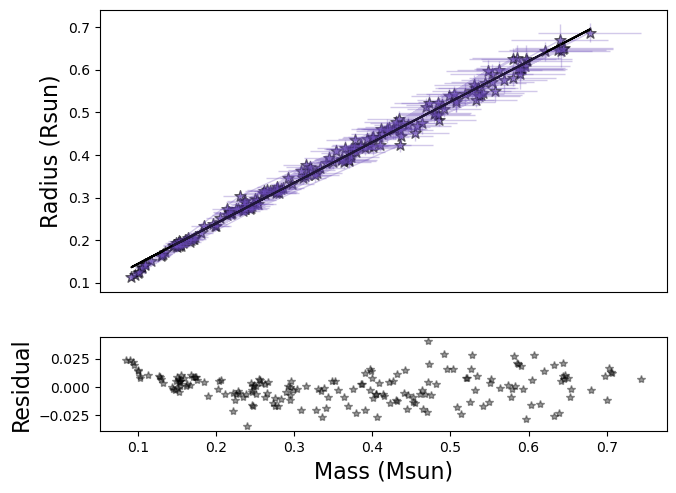

In [486]:
fig, (ax1, ax2) = plt.subplots(2, 1,  gridspec_kw={'height_ratios': [3, 1]})
fig.tight_layout()

ax2.errorbar(mass, y - radius, color = 'k', alpha = 0.4, fmt='*')
ax2.set_ylabel('Residual',  fontsize=16)
ax2.set_xlabel(f'Mass ({ data["M"].unit })',  fontsize=16)


ax1.set_ylabel(f'Radius ({ data["R"].unit })',  fontsize=16)
ax1.get_xaxis().set_ticks([])
ax1.errorbar(mass, radius, xerr = data['e_M'], yerr = data['e_R'], fmt='', alpha = 0.3, ms = 6, lw = 1, color = "#6d4dba",)
ax1.scatter(mass, radius, marker='*', s= 70, alpha = 0.6, lw = 1, color = "#6d4dba",  edgecolors='black')
ax1.plot(mass, y, color = 'black')


plt.show()

In [490]:
radius_chi = chi_square(y - radius, data['e_R'])
mass_chi = chi_square((radius - beta[0])/beta[1] - mass, data['e_M'])
print(radius_chi, mass_chi)

190.6525584784852 72.99553632606614


### Weighting data

0.888820369900018 0.05164703548250264


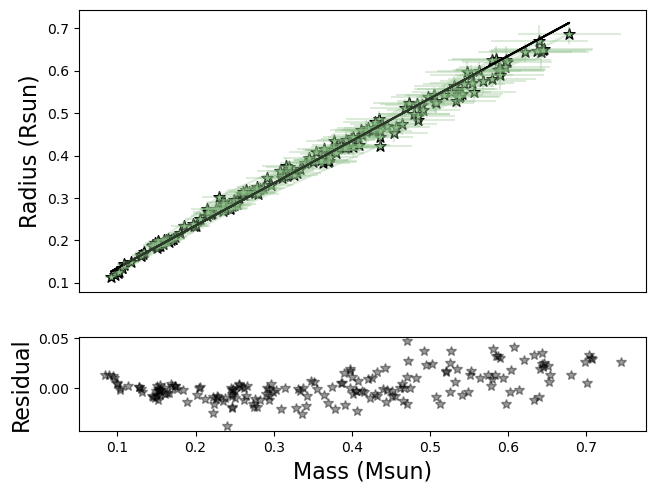

In [423]:
weighted_fit, cov_matrix = np.polyfit(mass, radius, 1, w = 1/data['e_M'], cov='unscaled')
m_w, b_w = weighted_fit
print(m_w, b_w)

fig, (ax1, ax2) = plt.subplots(2, 1,  gridspec_kw={'height_ratios': [3, 1]})
fig.tight_layout()


ax2.errorbar(mass, m_w* mass + b_w - radius, color = 'black', alpha = 0.4, fmt='*', ms = 7)
ax2.set_ylabel('Residual',  fontsize=16)
ax2.set_xlabel(f'Mass ({ data["M"].unit })',  fontsize=16)


ax1.set_ylabel(f'Radius ({ data["R"].unit })',  fontsize=16)
ax1.get_xaxis().set_ticks([])
ax1.errorbar(mass, radius, xerr = data['e_M'], yerr = data['e_R'], fmt='', alpha = 0.3, ms = 6, lw = 1.5, color = "#8cbf87",)

ax1.scatter(mass, radius, marker='*', s= 70, alpha = 1, lw = 1, color = "#8cbf87",  edgecolors='black')

ax1.plot(mass, m_w* mass + b_w, color = 'black')


plt.show()

In [428]:
print() 
print('Covariance matrix = ')
print(cov_matrix)


Covariance matrix = 
[[ 1.95287617e-04 -3.89288737e-05]
 [-3.89288737e-05  1.07588114e-05]]


$$
\text{Covariance matrix} = \begin{bmatrix}
1.95 * 10^{-4} & -3.89 * 10^{-5} \\
-3.89 * 10^{-5}  & 1.08 * 10^{-5}
\end{bmatrix} \
$$

In [637]:
radius_chi = chi_square((m_w*mass) + b_w - radius, data['e_R'])
mass_chi = chi_square((radius - b_w)/m_w - mass, data['e_M'])
print("Chi Squared: ",radius_chi, mass_chi)

Chi Squared:  161.3482956759472 42.571087101788486


## Adding error (in x and y) Bootstrapping


In [636]:
M_error = data['e_M']
R_error = data['e_R']
def data_with_error():
    new_R = np.random.normal(0, R_error) + radius
    new_M = np.random.normal(0, M_error) + mass
    m, b = np.polyfit(new_M, new_R, 1)
    return(m, b)

In [351]:
r_rand = np.random.normal(0,R_error)
#print(r_rand [0:3])
#print(radius[0:3])
#print((r_rand + radius)[0:3])

In [352]:
mb_list = [data_with_error() for i in range(1000)]
mb_list = np.array(m_list)
print(np.median(mb_list[:, 1]))
print(np.median(mb_list[:, 0]))

0.08154979729714043
0.8019277953598289


In [353]:
#find gradiant and offset 
colors = ['#a8efa1', '#676fca']

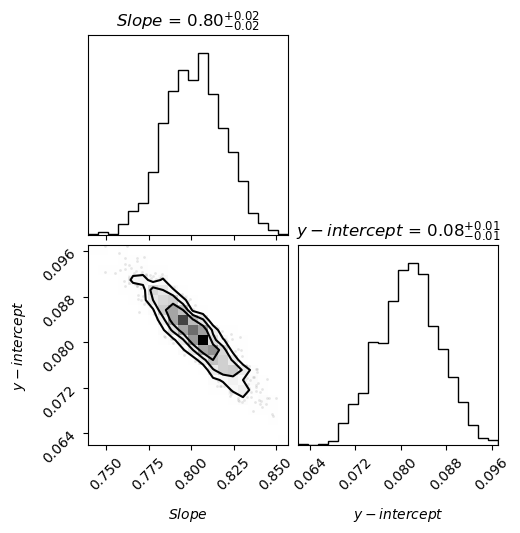

In [354]:
import corner

mb_list
figure = corner.cornerfigure = corner.corner(
    mb_list,
    labels=[
        r"$Slope$",
        r"$y-intercept$",
    ],
    show_titles=True,
    title_kwargs={"fontsize": 12},
)

plt.show()

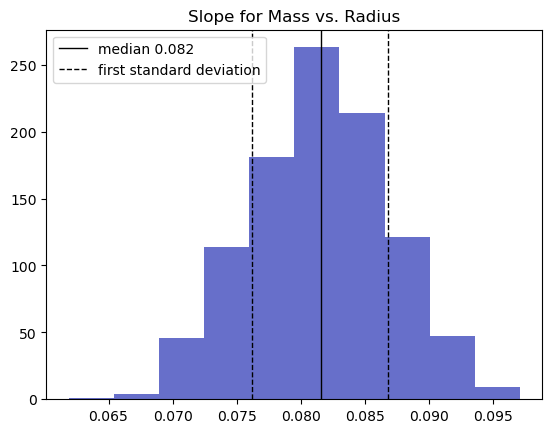

In [374]:
#plotting histogram of m
counts, bins = np.histogram(mb_list[:, 1])

plt.hist(bins[:-1], bins, weights=counts, color = colors[1])
plt.axvline(np.median(mb_list[:, 1]), color='k', linewidth=1, label = f"median {round(np.median(mb_list[:, 1]),3)}")
plt.axvline(mb_list[:, 1].mean() + mb_list[:, 1].std(), color='k', linestyle='dashed', linewidth=1, label = "first standard deviation")
plt.axvline(mb_list[:, 1].mean() - mb_list[:, 1].std(), color='k', linestyle='dashed', linewidth=1)
plt.legend(loc='upper left')
plt.title("Slope for Mass vs. Radius")
plt.show()



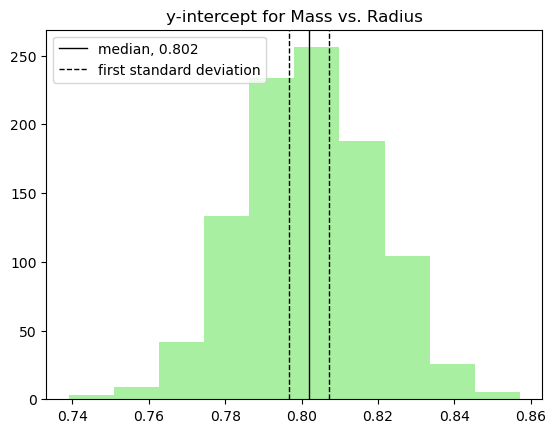

In [356]:
counts, bins = np.histogram(mb_list[:, 0])

plt.hist(bins[:-1], bins, weights=counts, color = colors[0])
plt.axvline(np.median(mb_list[:, 0]), color='k', linewidth=1, label = f"median, {round(np.median(mb_list[:, 0]),3)}")
plt.axvline(mb_list[:, 0].mean() + mb_list[:, 1].std(), color='k', linestyle='dashed', linewidth=1, label = "first standard deviation")
plt.axvline(mb_list[:, 0].mean() - mb_list[:, 1].std(), color='k', linestyle='dashed', linewidth=1)
plt.legend(loc='upper left')
plt.title("y-intercept for Mass vs. Radius")
plt.show()

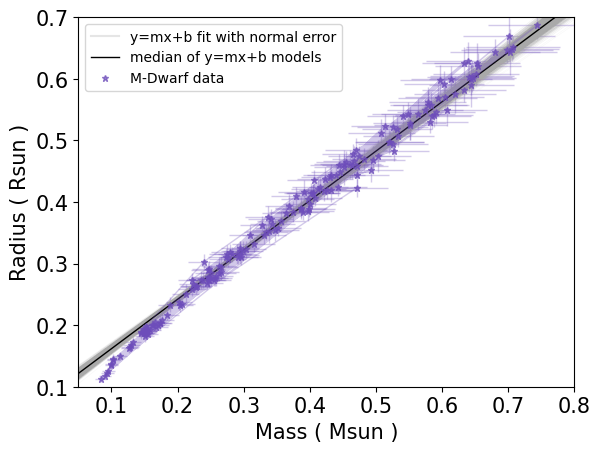

In [379]:
#plt.scatter(mass, radius)
mass_values = np.linspace(0.05, .8)

plt.errorbar(mass, radius, xerr = data['e_M'], yerr = data['e_R'], fmt='', alpha = 0.3, ms = 6, lw = 1, color = "#6d4dba")
plt.errorbar(mass, radius, fmt='*', alpha = 0.7, ms = 5, lw = 1, color = "#6d4dba", label = "M-Dwarf data")

for i in mb_list:
    plt.plot(mass_values, i[1] + mass_values * i[0], color = "darkgrey", alpha = 0.1, linewidth = .3
            
            )

plt.plot(mass_values,i[1] + mass_values * i[0], color = "darkgrey", alpha = 0.3, label = "y=mx+b fit with normal error")

plt.plot(mass_values, np.median(mb_list[:, 1]) + mass_values * np.median(mb_list[:, 0]), color = 'k', linewidth = 1
         ,  label = "median of y=mx+b models")



plt.ylim(0.1, .7)
plt.xlim(0.05, .8)
plt.legend()

plotting()


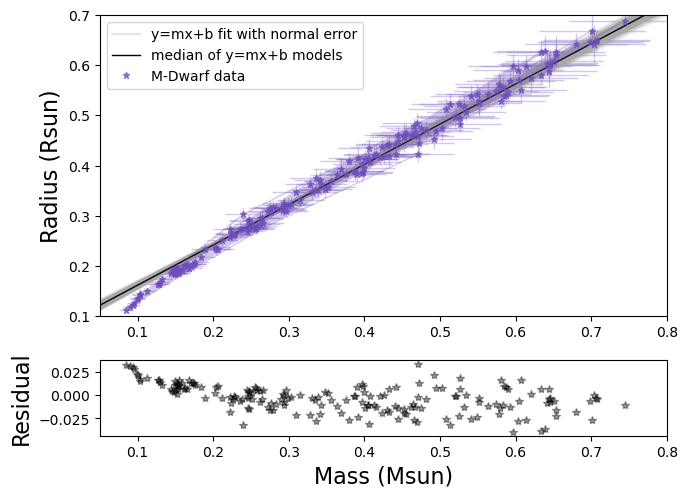

In [464]:

fig, (ax1, ax2) = plt.subplots(2, 1,  gridspec_kw={'height_ratios': [4, 1]})
fig.tight_layout()


#main plot
##data
ax1.errorbar(mass, radius, xerr = data['e_M'], yerr = data['e_R'], fmt='', alpha = 0.3, ms = 6, lw = 1, color = "#6d4dba")
ax1.errorbar(mass, radius, fmt='*', alpha = 0.7, ms = 5, lw = 1, color = "#6d4dba", label = "M-Dwarf data")

#modeled data
for i in mb_list:
    ax1.plot(mass_values, i[1] + mass_values * i[0], color = "darkgrey", alpha = 0.1, linewidth = .3
            
            )
#modeled data for ledgend
ax1.plot(mass_values,i[1] + mass_values * i[0], color = "darkgrey", alpha = 0.3, label = "y=mx+b fit with normal error")

#median modeled data for ledgend
ax1.plot(mass_values, np.median(mb_list[:, 1]) + mass_values * np.median(mb_list[:, 0]), color = 'k', linewidth = 1
         ,  label = "median of y=mx+b models")

#residual
ax2.errorbar(mass, i[1] + mass*i[0] - radius, color = 'k', alpha = 0.4, fmt='*')

#labels
ax2.set_ylabel('Residual',  fontsize=16)
ax2.set_xlabel(f'Mass ({ data["M"].unit })',  fontsize=16)
ax1.set_ylabel(f'Radius ({ data["R"].unit })',  fontsize=16)

ax1.set_ylim(0.1, .7)
ax1.set_xlim(0.05, .8)
ax2.set_xlim(0.05, .8)
ax1.legend()
plt.show()

In [638]:
m = np.median(mb_list[:, 0])
b = np.median(mb_list[:, 1])
radius_chi = chi_square((m*mass) + b - radius, data['e_R'])
mass_chi = chi_square((radius - b)/m - mass, data['e_M'])
print("Chi Squared: ", radius_chi, mass_chi)

Chi Squared:  392.6592192939046 194.50148503566956


## Looking for min Chi in 1000 trials

In [630]:
lst = []
for i in mb_list:
    r_chi = chi_square((i[0]*mass) + i[1] - radius, data['e_R'])
    m_chi = chi_square((radius - i[1])/i[0] - mass, data['e_M'])
    lst.append([i[0], i[1], r_chi, m_chi])

In [625]:
min_m_chi = lst[0]
min_r_chi = lst[0]
for i in lst:
    if i[2] < min_r_chi[2]:
        min_r_chi = i
    if i[3] < min_m_chi[3]:
        min_m_chi = i

In [629]:
print(min_m_chi) 
print(min_r_chi)

[0.8571650555057192, 0.06190822636979091, 171.74239343937217, 59.84241102789036]
[0.8571650555057192, 0.06190822636979091, 171.74239343937217, 59.84241102789036]


In [639]:
print("Chi Squared: ", min_m_chi[2], min_m_chi[3])

Chi Squared:  171.74239343937217 59.84241102789036


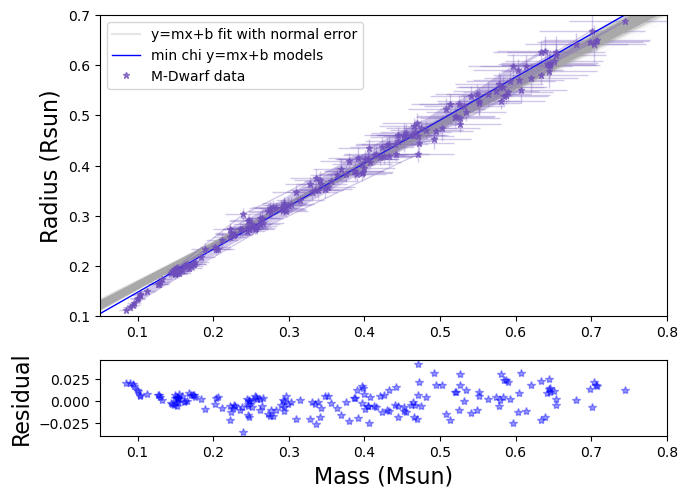

In [632]:

fig, (ax1, ax2) = plt.subplots(2, 1,  gridspec_kw={'height_ratios': [4, 1]})
fig.tight_layout()


#main plot
##data
ax1.errorbar(mass, radius, xerr = data['e_M'], yerr = data['e_R'], fmt='', alpha = 0.3, ms = 6, lw = 1, color = "#6d4dba")
ax1.errorbar(mass, radius, fmt='*', alpha = 0.7, ms = 5, lw = 1, color = "#6d4dba", label = "M-Dwarf data")

#modeled data
for i in mb_list:
    ax1.plot(mass_values, i[1] + mass_values * i[0], color = "darkgrey", alpha = 0.1, linewidth = .3
            
            )
#modeled data for ledgend
ax1.plot(mass_values,i[1] + mass_values * i[0], color = "darkgrey", alpha = 0.3, label = "y=mx+b fit with normal error")

#min modeled data for ledgend
ax1.plot(mass_values,  min_m_chi[1] + mass_values * min_m_chi[0], color = 'b', linewidth = 1
         ,  label = "min chi y=mx+b models")


#residual
ax2.errorbar(mass, min_m_chi[1] + (mass * min_m_chi[0]) - radius, color = 'b', alpha = 0.4, fmt='*')


#labels
ax2.set_ylabel('Residual',  fontsize=16)
ax2.set_xlabel(f'Mass ({ data["M"].unit })',  fontsize=16)
ax1.set_ylabel(f'Radius ({ data["R"].unit })',  fontsize=16)

ax1.set_ylim(0.1, .7)
ax1.set_xlim(0.05, .8)
ax2.set_xlim(0.05, .8)
ax1.legend()
plt.show()

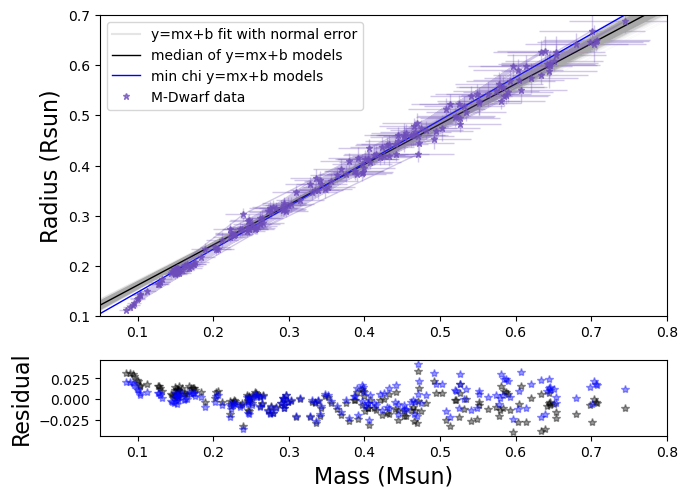

In [634]:

fig, (ax1, ax2) = plt.subplots(2, 1,  gridspec_kw={'height_ratios': [4, 1]})
fig.tight_layout()


#main plot
##data
ax1.errorbar(mass, radius, xerr = data['e_M'], yerr = data['e_R'], fmt='', alpha = 0.3, ms = 6, lw = 1, color = "#6d4dba")
ax1.errorbar(mass, radius, fmt='*', alpha = 0.7, ms = 5, lw = 1, color = "#6d4dba", label = "M-Dwarf data")

#modeled data
for i in mb_list:
    ax1.plot(mass_values, i[1] + mass_values * i[0], color = "darkgrey", alpha = 0.1, linewidth = .3
            
            )
#modeled data for ledgend
ax1.plot(mass_values,i[1] + mass_values * i[0], color = "darkgrey", alpha = 0.3, label = "y=mx+b fit with normal error")

#median modeled data for ledgend
ax1.plot(mass_values, np.median(mb_list[:, 1]) + mass_values * np.median(mb_list[:, 0]), color = 'k', linewidth = 1
         ,  label = "median of y=mx+b models")
ax1.plot(mass_values,  min_m_chi[1] + mass_values * min_m_chi[0], color = 'b', linewidth = 1
         ,  label = "min chi y=mx+b models")


#residual
ax2.errorbar(mass, i[1] + mass*i[0] - radius, color = 'k', alpha = 0.4, fmt='*')
ax2.errorbar(mass, min_m_chi[1] + (mass * min_m_chi[0]) - radius, color = 'b', alpha = 0.4, fmt='*')

#labels
ax2.set_ylabel('Residual',  fontsize=16)
ax2.set_xlabel(f'Mass ({ data["M"].unit })',  fontsize=16)
ax1.set_ylabel(f'Radius ({ data["R"].unit })',  fontsize=16)

ax1.set_ylim(0.1, .7)
ax1.set_xlim(0.05, .8)
ax2.set_xlim(0.05, .8)
ax1.legend()
plt.show()